In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"D:\Ultimate Programming\Data Bases\ESD.xlsx")
print(df.isnull().sum().sum())
df.head(2)

915


,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT


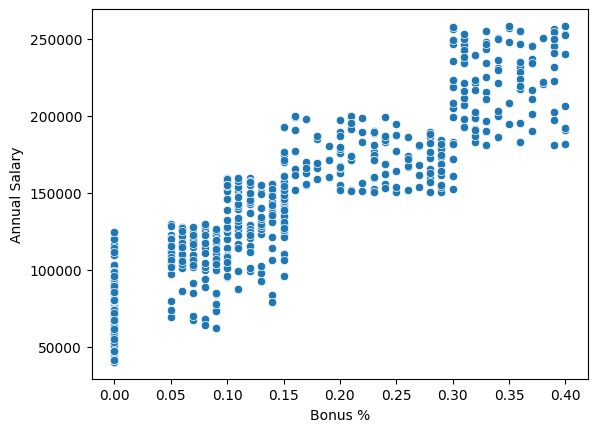

In [3]:
sns.scatterplot(data=df, x='Bonus %', y='Annual Salary')
plt.show()

In [4]:
x = df[['Bonus %']]
y = df['Annual Salary']

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [8]:
print(dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100)

88.52780270174631 85.40095259781721


In [14]:
ds = [{
    'criterion' : ["squared_error", "friedman_mse", "absolute_error","poisson"],
    'max_depth' : [i for i in range (2,20)],
    'min_samples_split' : [i for i in range(2,25)]
}]

In [15]:
gs = GridSearchCV(DecisionTreeRegressor(), param_grid=ds)
gs.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid=[{'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error', 'poisson'],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                12, 13, 14, 15, 16, 17, 18, 19,
                                                20, 21, 22, 23, 24]}])

In [16]:
gs.best_params_

{'criterion': 'squared_error', 'max_depth': 4, 'min_samples_split': 21}

In [17]:
dt = DecisionTreeRegressor(criterion='squared_error', max_depth=3, min_samples_split=21)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100)

88.09017590619075 86.75414190117785


In [19]:
rd = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=ds, n_iter=20)
rd.fit(x_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions=[{'criterion': ['squared_error',
                                                       'friedman_mse',
                                                       'absolute_error',
                                                       'poisson'],
                                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                       10, 11, 12, 13, 14, 15,
                                                       16, 17, 18, 19],
                                         'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                               8, 9, 10, 11, 12,
                                                               13, 14, 15, 16,
                                                               17, 18, 19, 20,
                                                               21, 22, 23,
                                                               24]}])

In [20]:
gs.best_params_

{'criterion': 'squared_error', 'max_depth': 4, 'min_samples_split': 21}